ECE 4580 Digital Image Processing HW2 - Hiten Kothari


In [2]:
#Importing Libraries and Mounting Drive
from google.colab import drive
from skimage import io,data,filters
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
import time

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
def part1(image,bins):

  L = 256
  pixel_bins = 1/bins
  output_bins = L//bins

  y_array = np.arange(output_bins-1,256,output_bins)
  x_array = []

  #Manually calculating histogram
  hist_vector=np.zeros(L)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      hist_vector[image[i,j]]=hist_vector[image[i,j]]+1

  ###### HISTOGRAM EQUALIZATION AS PER TEXTBOOK (GONZALEZ) ######

  #Manually calculating PDF
  pdf = hist_vector/np.sum(hist_vector)

  #Manually equalizing Method 2
  # cdf2 = np.zeros_like(pdf)
  # cdf2[0]=pdf[0]
  # for i in range(1,len(pdf)):
  #   temp = cdf2[i-1]+pdf[i]
  #   cdf2[i] = temp
  #   if temp>=pixel_bins:
  #     x_array.append(i)
  #     cdf2[i]=0
  # x_array.append(255)
  # # print(x_array,y_array)
  # temp_array = x_array/y_array
  # print(temp_array)
  # new_inp = np.arange(0,256)
  # print(new_inp)


  #CDF using numpy
  cdf = np.cumsum(pdf)

  # cdf = np.round(cdf*(L-1)) #cdf using gonzalez method
  # output_image = cdf[image].astype("uint8")

  ####### HISTOGRAM EQUALIZATION AS PER SLIDES #####

# Manually equalizaing Method 1
  # for i in range(bins):
  #   cdf[i*(L//bins):(i+1)*(L//bins)] = (cdf[i*(L//bins):(i+1)*(L//bins)]*((i+1)*L//bins))
  #   # cdf = np.round(cdf)

  # output_image2 = cdf[image].astype("uint8")

 #  Manually equalizing Method 2
  mapping = ((cdf - cdf.min())/(cdf.max()-cdf.min())*(bins - 1)).astype("uint8")
  output_image4 = mapping[image]

  ###### HISTOGRAM EQUALIZATION USING OPENCV FOR VERIFICATION #####
  output_image3 = cv.equalizeHist(image)

  #### DEBUG PURPOSE ####

  # # #Image Comparison
  # f1, axarr1 = plt.subplots(3,1)
  # axarr1[0].imshow(image,cmap="gray")
  # axarr1[1].imshow(output_image,cmap="gray")
  # axarr1[2].imshow(output_image3,cmap="gray")
  # f1.suptitle("Image Comparison before and after Histogram Equalization")


  # # #Histogram Comparison
  # f2, axarr2 = plt.subplots(3,1)
  # axarr2[0].hist(image.ravel(), bins=256, range=(0.0, 255.0),color="green")
  # axarr2[1].hist(output_image.ravel(), bins=256, range=(0.0, 255.0),color="red")
  # axarr2[2].hist(output_image3.ravel(), bins=256, range=(0.0, 255.0),color="blue")
  # f2.suptitle("Histogram Comparison before and after Histogram Equalization")

  # # #PDF and CDF Comparison
  # # #Original Image
  # count, bins_count = np.histogram(image.ravel())
  # pdf = count / sum(count)
  # cdf = np.cumsum(pdf)

  # f3, axarr3 = plt.subplots(3,1)
  # axarr3[0].plot(bins_count[1:], pdf, color="red", label="PDF")
  # axarr3[0].plot(bins_count[1:], cdf, label="CDF")
  # axarr3[0].legend()

  # #Manual Equalized Image
  # count2, bins_count = np.histogram(output_image.ravel())
  # pdf2 = count2 / sum(count2)
  # cdf2 = np.cumsum(pdf2)

  # axarr3[1].plot(bins_count[1:], pdf2, color="orange", label="PDF2")
  # axarr3[1].plot(bins_count[1:], cdf2, color="green",label="CDF2")
  # axarr3[1].legend()

 # Manually Equalized Image 2
  # count4, bins_count = np.histogram(output_image4.ravel())
  # pdf4 = count4 / sum(count4)
  # cdf4 = np.cumsum(pdf4)

  # plt.plot(bins_count[1:], pdf4, color="orange", label="PDF4")
  # plt.plot(bins_count[1:], cdf4, color="green",label="CDF4")
  # plt.legend()

  # # OpenCV Equalized Image
  # count3, bins_count = np.histogram(output_image3.ravel())
  # pdf3 = count3 / sum(count3)
  # cdf3 = np.cumsum(pdf3)

  # axarr3[2].plot(bins_count[1:], pdf3, color="black", label="PDF3")
  # axarr3[2].plot(bins_count[1:], cdf3, color="pink",label="CDF3")
  # axarr3[2].legend()
  # f3.suptitle("Comparing PDF and CDF before and after")

  return output_image4



In [ ]:
def part2(image,flag):


  #Flag variable is used to toggle outputs based on whether part2 or part3 is running
  if flag ==1:
    plt.imshow(image,cmap="gray")
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


  # Gaussian Filter Specs
  size = 11
  sigma = 1.75
  range_x = np.arange(-size//2+1,size//2+1)
  range_y = np.arange(-size//2+1,size//2+1)
  gdf = np.zeros([size,size])
  gdf_x = np.zeros([size,1])

  #loop for generating 1d and 2d gaussian filter
  for i in range(gdf.shape[0]):
    gdf_x[i]= (1/(math.sqrt(2*math.pi)*(sigma)))*math.exp(-(range_x[i]**2)/(2*(sigma)**2)) #creating 1d gaussian filter
    for j in range(gdf.shape[1]):
      gdf[i,j]= (1/(2*math.pi*(sigma)**2))*math.exp(-(range_x[i]**2+range_y[j]**2)/(2*(sigma)**2)) #creating 2d gaussian filter
  # gdf = gdf/np.sum(gdf)

  gdf_y = np.transpose(gdf_x)
  gdf2 = np.matmul(gdf_x,gdf_y)
  # gdf2 = gdf2/np.sum(gdf2)

  if flag ==1:
    gdf_difference = gdf2-gdf
    print("Checking Difference between 2D and 1D Gaussian Filters: \nMean: ",np.mean(gdf_difference),"\nStandard Deviation: ", np.std(gdf_difference)) #Check for difference in both kernels

  #Making image from 2d filter to compare later
  blurred = np.zeros_like(image,dtype=np.float32)
  if len(image.shape)==3:
    for channel in range(3):
        blurred[:, :, channel] = filters.correlate_sparse(image[:, :, channel], gdf)
  else:
    blurred = filters.correlate_sparse(image,gdf)

  blurred = blurred.astype("uint8")

  if flag ==1:
    #Making image from 1d filters to compare later
    blurred2 = np.zeros_like(image,dtype=np.float32)
    if len(image.shape)==3:
      for channel in range(3):
          blurred2[:, :, channel] = filters.correlate_sparse(image[:, :, channel], gdf_x)
          blurred2[:, :, channel] = filters.correlate_sparse(blurred2[:, :, channel], gdf_y)
    else:
      blurred2 = filters.correlate_sparse(image,gdf_x)
      blurred2 = filters.correlate_sparse(blurred2,gdf_y)
    blurred2 = blurred2.astype("uint8")

  if flag ==1:
    # Image Comparison
    # 2D Filtered Image vs 1D Filtered Image

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(blurred, cmap='gray')
    plt.title('Using 2D Gaussian Smoothened Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(blurred2, cmap='gray')
    plt.title('Using 1D Gaussian Smoothened Image')
    plt.axis('off')
    plt.show()

    # # Original Image vs 2D Filtered Image
    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')
    # plt.axis('off')
    # plt.subplot(1, 2, 2)
    # plt.imshow(blurred, cmap='gray')
    # plt.title('2D Gaussian Smoothened Image')
    # plt.axis('off')
    # plt.show()

    # # Original Image vs 1D Filtered Image
    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')
    # plt.axis('off')
    # plt.subplot(1, 2, 2)
    # plt.imshow(blurred2, cmap='gray')
    # plt.title('1D Gaussian Smoothened Image')
    # plt.axis('off')
    # plt.show()


    # #Statistical Comparison
    blur_diff= blurred-blurred2
    print("Checking difference between 2D Gaussian and 1D Gaussian Smoothened Image:")
    print("Mean: ",np.mean(blur_diff))
    print("Standard Deviation: ",np.std(blur_diff),"\n")

  return blurred

In [ ]:
def part3(image,k,flag):
  print("k: ",k)

  #generating smoothened image
  blurred = part2(image,flag)

  #generating sharpened image
  sharp = np.zeros_like(image)
  # sharp = image + k * (image-blurred) #Textbook Method
  sharp = image - k*blurred #Lecture Method

  return np.clip(sharp, 0, 255).astype(np.uint8)

PART I: 


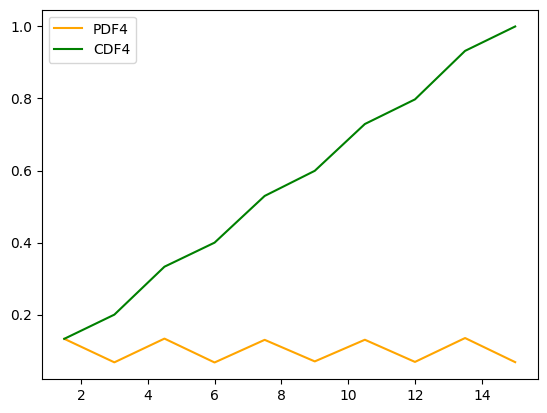

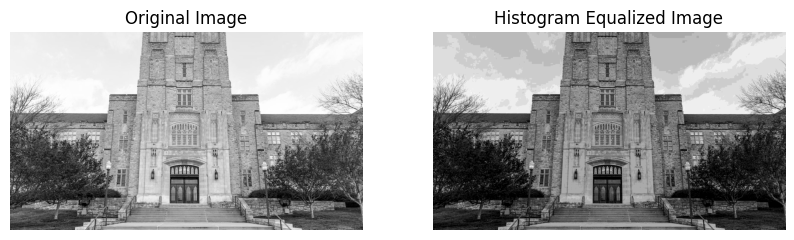

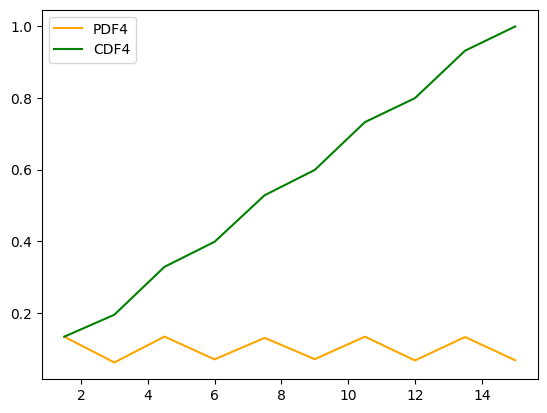

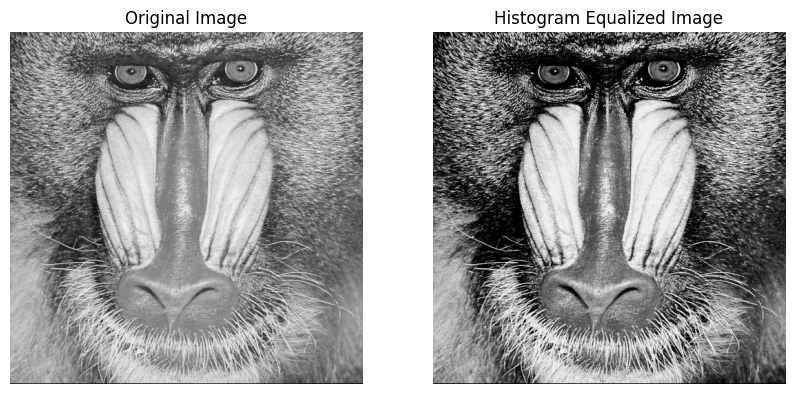

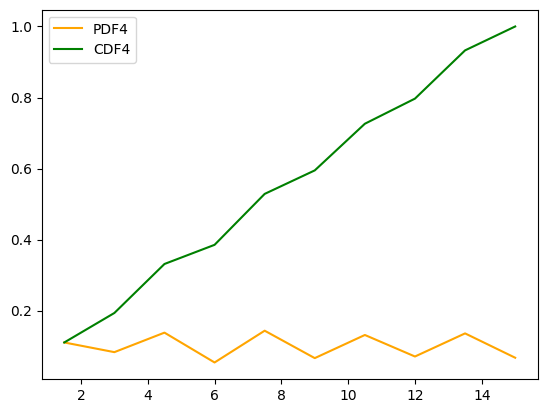

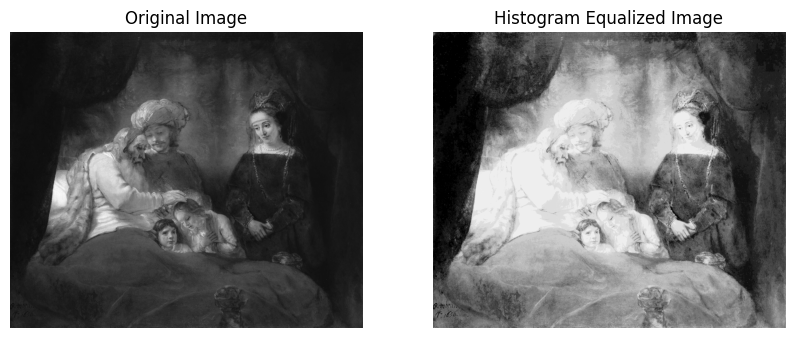

In [20]:
def main():

  #Loading Images
  image = io.imread("/content/drive/MyDrive/Images/burruss.jpg")
  g_image = np.mean(image,axis=2,keepdims=False).astype(np.uint8)

  image2 = io.imread("/content/drive/MyDrive/Images/mandrill.png")
  g_image2 = np.mean(image2,axis=2,keepdims=False).astype(np.uint8)

  image3 = io.imread("/content/drive/MyDrive/Images/rembrandt.jpeg")
  g_image3 = np.mean(image3,axis=2,keepdims=False).astype(np.uint8)

  #Part I
  print("PART I: ")
  bins = 16
  he_image = part1(g_image,bins)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(g_image, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(he_image, cmap='gray')
  plt.title('Histogram Equalized Image')
  plt.axis('off')
  plt.show()

  he_image2 = part1(g_image2,bins)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(g_image2, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(he_image2, cmap='gray')
  plt.title('Histogram Equalized Image')
  plt.axis('off')
  plt.show()

  he_image3 = part1(g_image3,bins)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(g_image3, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(he_image3, cmap='gray')
  plt.title('Histogram Equalized Image')
  plt.axis('off')
  plt.show()

  # #PART II
  # print("PART II: ")
  # part_flag = 1
  # print("Image 1: ")
  # part2(g_image,part_flag)
  # print("Image 2: ")
  # part2(g_image2,part_flag)

  # #PART III
  # print("PART III: ")
  # part_flag = 0

  # # Image 1
  # print("Image 1: ")
  # plt.imshow(image2)
  # plt.title('Original Image')
  # plt.axis('off')
  # plt.show()

  # k = 0.5
  # sharp_image = part3(image2,k,part_flag)
  # plt.imshow(sharp_image)
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # # plt.subplot(1, 2, 1)
  # # # # plt.imshow(image, cmap='gray')
  # # # # plt.title('Original Image')
  # # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

  # k = 0.3
  # sharp_image2 = part3(image2,k,part_flag)
  # plt.imshow(sharp_image2)
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # plt.subplot(1, 2, 1)
  # # # plt.imshow(image, cmap='gray')
  # # # plt.title('Original Image')
  # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image2, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

  # k=0.7
  # sharp_image3 = part3(image2,k,part_flag)
  # plt.imshow(sharp_image3)
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # plt.subplot(1, 2, 1)
  # # # plt.imshow(image, cmap='gray')
  # # # plt.title('Original Image')
  # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image3, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

  # # Image 2
  # print("Image 1: ")
  # plt.imshow(g_image,cmap="gray")
  # plt.title('Original Image')
  # plt.axis('off')
  # plt.show()

  # k = 0.5
  # sharp_image4 = part3(g_image,k,part_flag)
  # plt.imshow(sharp_image4,cmap="gray")
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # plt.subplot(1, 2, 1)
  # # # plt.imshow(image2, cmap='gray')
  # # # plt.title('Original Image')
  # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image4, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

  # k = 0.3
  # sharp_image5 = part3(g_image,k,part_flag)
  # plt.imshow(sharp_image5,cmap="gray")
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # plt.subplot(1, 2, 1)
  # # # plt.imshow(image2, cmap='gray')
  # # # plt.title('Original Image')
  # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image5, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

  # k = 0.7
  # sharp_image6 = part3(g_image,k,part_flag)
  # plt.imshow(sharp_image6,cmap="gray")
  # plt.title('Sharpened Image')
  # plt.axis('off')
  # plt.show()

  # # plt.figure(figsize=(10, 5))
  # # # plt.subplot(1, 2, 1)
  # # # plt.imshow(image2, cmap='gray')
  # # # plt.title('Original Image')
  # # # plt.axis('off')
  # # plt.subplot(1, 2, 2)
  # # plt.imshow(sharp_image6, cmap='gray')
  # # plt.title('Sharpened Image')
  # # plt.axis('off')
  # # plt.show()

main()

For Part III, according to me, the output looks most sharpened and sufficiently bright for k=0.3. As we go higher, the output becomes quite dark.

Citations:
1. Burruss Hall Image: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.cnn.com%2F2020%2F08%2F14%2Fus%2Fvirginia-tech-dorm-rename%2Findex.html&psig=AOvVaw1bEbevpLaKB2rzHBqX6NLe&ust=1693525903470000&source=images&cd=vfe&opi=89978449&ved=0CA8QjRxqFwoTCPii_-DJhYEDFQAAAAAdAAAAABAJ
2. Rembrandt Image: https://en.wikipedia.org/wiki/File:Rembrandt_-_Jacob_Blessing_the_Children_of_Joseph_-_WGA19117.jpg



In [ ]:
# The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install --quiet pypandoc

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.17_all.deb ...
Unpacking tex-common (6.17) ...
Selecting previously unselected package fonts-urw-base35.
Preparing to unpack .../04-fonts-urw-base35_20200910-1_all.deb ...
Unpacking fonts-urw-base35 (20200910-1) ...
Selecting previously unselected package libgs9-co

In [ ]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ECE4580_HW2.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ECE4580_HW2.ipynb to PDF
[NbConvertApp] Writing 72781 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 70617 bytes to /content/drive/My Drive/Colab Notebooks/ECE4580_HW2.pdf
